In [ ]:
!pip install gdown -q


In [ ]:
!gdown http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip -q

In [ ]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
from keras.datasets import imdb
from keras import preprocessing, Sequential
from keras.layers import Flatten, Dense, Embedding , LSTM
import numpy as np
from keras.preprocessing.sequence import  pad_sequences
from keras.preprocessing.text import Tokenizer
import os

In [ ]:
max_features = 10000
maxlen = 100
embed_dim = 100

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
def plot_results(history):
    # plot results
    import matplotlib.pyplot as plt

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs,acc,'r',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.plot(epochs,loss,'r',label = 'Training loss')
    plt.plot(epochs,val_loss,'b',label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
model.summary()
history = model.fit(x_train,y_train, epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_15 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 0.5392 - acc: 0.7066 - val_loss: 0.3439 - val_acc: 0.8514
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.1470 - acc: 0.9476 - val_loss: 

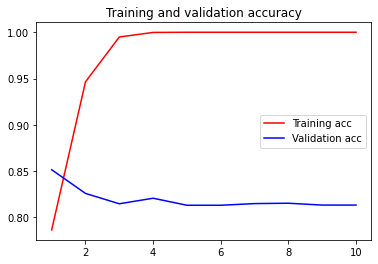

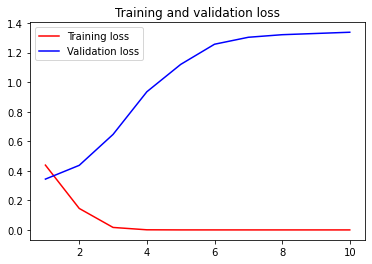

In [ ]:
plot_results(history)

In [ ]:
acc = model.evaluate(x_test,y_test)
print(f"Model has an accuracy of {acc[1]}")

782/782 [==============================] - 2s 2ms/step - loss: 1.3028 - acc: 0.8180
Model has an accuracy of 0.8179600238800049


In [ ]:
glove_dir = "/content/"
embeddings_index = {}

f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embeddings_index[word] = coefs
f.close()
print("Found %s words vectors." %len(embeddings_index))


Found 400000 words vectors.


In [ ]:
embedding_matrix = np.zeros((max_features,embed_dim))
word_index = imdb.get_word_index()

for word,i in word_index.items():
    if i < max_features:
        embeddings_vector = embeddings_index.get(word)
        if embeddings_vector is not None:
            embedding_matrix[i] = embeddings_vector

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
def model(train):
  model = Sequential()
  model.add(Embedding(max_features,embed_dim,input_length=maxlen))
  model.add(Flatten())
  model.add(Dense(32,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  # load embedding matrix and freez embedding layer weights
  model.layers[0].set_weights([embedding_matrix])
  if not train:
    model.layers[0].trainable = False
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
  model.summary()
  return model

In [ ]:
model1 = model(False)
history = model1.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_16 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 320,065
Non-trainable params: 1,000,000
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.7335 - acc: 0.4954 - val_loss: 0.6933 - val_acc: 0.4926
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.6930 - acc: 0.5120 - val_lo

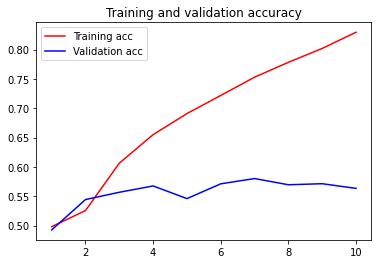

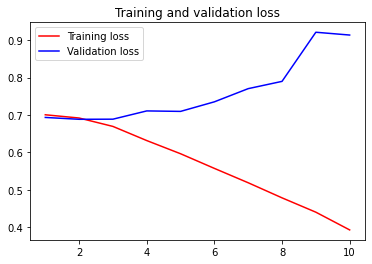

In [ ]:
plot_results(history)

In [ ]:
model2 = model(True)
history = model2.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
flatten_17 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 9s 14ms/step - loss: 0.7825 - acc: 0.4967 - val_loss: 0.6933 - val_acc: 0.4938
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.6931 - acc: 0.5110 - val_loss: 

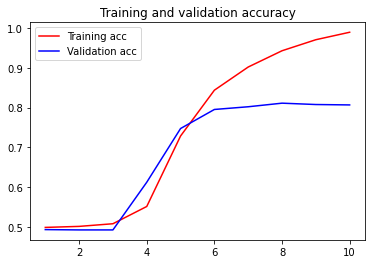

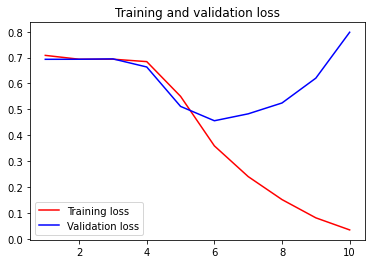

In [ ]:
plot_results(history)

In [ ]:
acc1 = model1.evaluate(x_test,y_test)
acc2 = model2.evaluate(x_test,y_test)
print(f"Accuracy with frozen weights: {acc1[1]}")
print(f"Accuracy without frozen weights: {acc2[1]}")

782/782 [==============================] - 2s 2ms/step - loss: 0.8062 - acc: 0.8042
Accuracy with frozen weights: 0.5626800060272217
Accuracy without frozen weights: 0.8041599988937378


In [ ]:
model3 = Sequential()
model3.add(Embedding(max_features,embed_dim, input_length=maxlen))

model3.add(LSTM(32,return_sequences = True))

model3.add(Flatten())
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['acc'])
model3.summary()
history = model3.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 32)           17024     
_________________________________________________________________
flatten_19 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 3201      
Total params: 1,020,225
Trainable params: 1,020,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 18s 105ms/step - loss: 0.5321 - acc: 0.7084 - val_loss: 0.3457 - val_acc: 0.8488
Epoch 2/10
157/157 [==============================] - 16s 104ms/step - loss: 0.2793 - acc: 0.8918 - val_lo

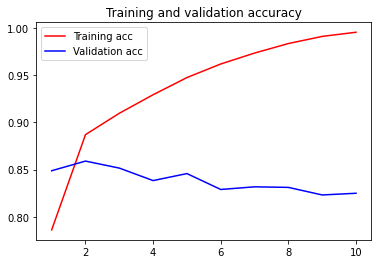

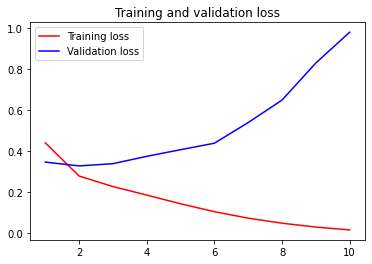

In [ ]:
plot_results(history)

In [ ]:
acc3 = model3.evaluate(x_test,y_test)
print(f"Accuracy with LSTM: {acc3[1]}")

782/782 [==============================] - 10s 12ms/step - loss: 1.0380 - acc: 0.8163
Accuracy with LSTM: 0.8162800073623657
